In [3]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [11]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [13]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [14]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [15]:
x_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


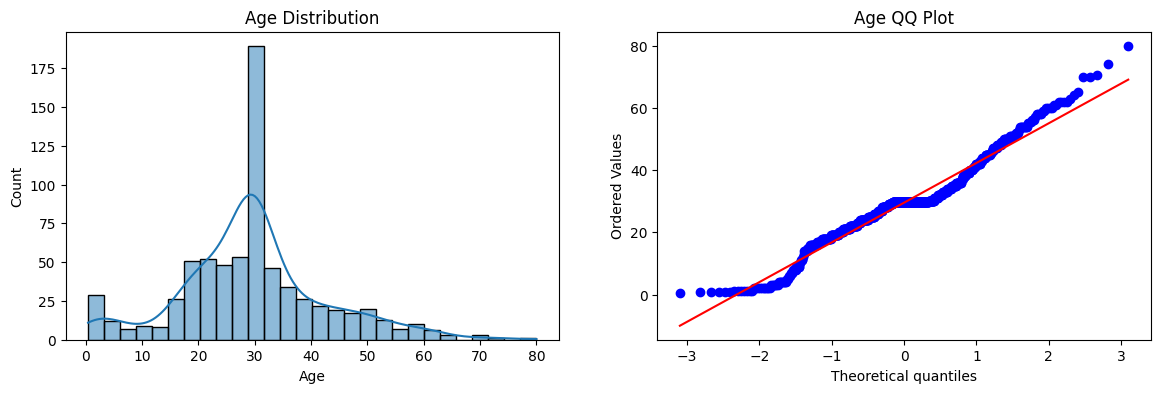

In [17]:
plt.figure(figsize=(14, 4))

# Histogram
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title("Age Distribution")

# QQ Plot
plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

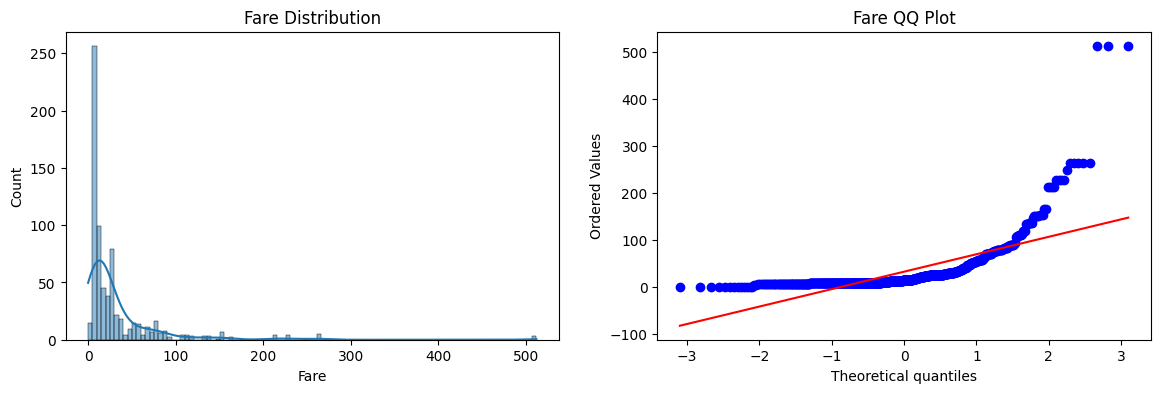

In [18]:
plt.figure(figsize=(14, 4))

# Histogram
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title("Fare Distribution")

# QQ Plot
plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.show()

In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [23]:
trf = FunctionTransformer(func = np.log1p)

In [25]:
x_train_transformed = trf.fit_transform(x_train)
x_test_Transformed = trf.transform(x_test)

In [27]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_Transformed)
y_pred1 = clf2.predict(x_test_Transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


Text(0.5, 1.0, 'Fare After Log')

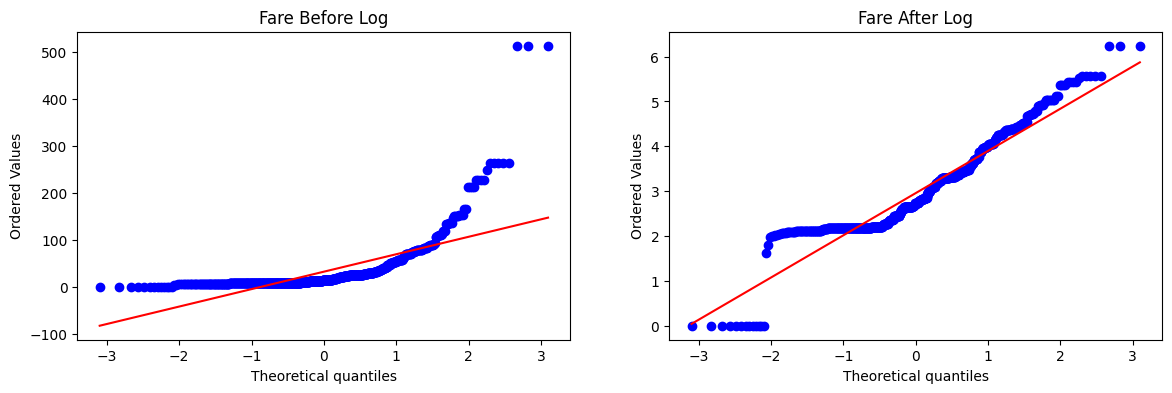

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist = "norm",plot = plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist = "norm",plot = plt)
plt.title("Fare After Log")

Text(0.5, 1.0, 'Age After Log')

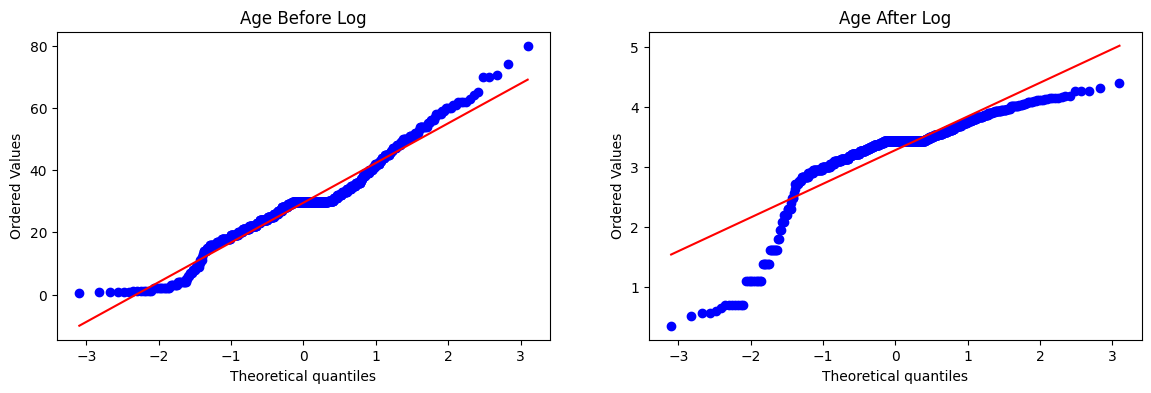

In [29]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist = "norm",plot = plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist = "norm",plot = plt)
plt.title("Age After Log")